# Supp Figure 1

email from Tuan on July 14th, 2023

I'm attaching six numpy text files. Two of them (rX.txt and J.txt) list the rX and J we used in units of spks/s and V respectively. The other four are the mean and stds of the moments from our 100 simulations for the different SSN coefficients. They have to be reshaped to have shape (4,5,10,4). The first index lists the activation function (RELU, SSN, Ricciardi Nonsaturating, Ricciardi/LIF) in that order. The second index lists the moments (r, Δr, σr, σΔr, ρ). The third index lists the rX used, and the fourth index lists the J used.

In [2]:
%reset
#%qtconsole
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import matplotlib.pyplot as plt

import numpy as np
import matplotlib as mpl
from scipy import stats

import os
import matplotlib.cm as cm


from scipy.interpolate import interp1d,interp2d
from scipy.optimize import least_squares

import pandas as pd





Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# Read simulations results
models=['ReLU','SSN','LIF','LIF_no_sat']
folder='simulations/'


J=np.loadtxt(folder+'J.txt')
results_mean=np.loadtxt(folder+'a_ssn=0.002_mean_moments.txt').reshape(4,5,10,4)
results_std=np.loadtxt(folder+'a_ssn=0.002_std_moments.txt').reshape(4,5,10,4)
rX=np.loadtxt(folder+'r_X.txt')
    



<ipython-input-32-197a146000fe>:44: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


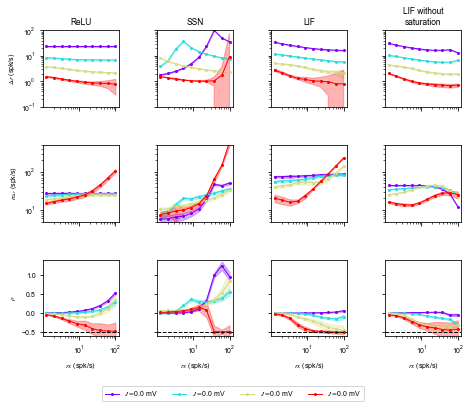

In [32]:
fig, axs = plt.subplots(3,len(models), figsize=(2.5*len(models),2.*4), 
                        facecolor='w', edgecolor='k',sharex=True,sharey='row')
fig.subplots_adjust(hspace = .5, wspace=.5)
area=1.0;linethicknes=1.0;
axs = axs.ravel()
font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42

for idx in range(2):
    axs[len(models)*idx].set_yscale('log')
axs[0].set_xscale('log')
colors=cm.rainbow(np.linspace(0,1,len(J)))
models=['ReLU','SSN','LIF','LIF without\nsaturation']
Possible_Moment=[1,3,4]
for idx_model in range(len(models)):
    axs[idx_model].set_title(models[idx_model])
    for idx in range(len(Possible_Moment)):
        idx_moment=Possible_Moment[idx]
        for idx_J in range(len(J)):
            m=results_mean[idx_model,idx_moment,:,idx_J]
            e=results_std[idx_model,idx_moment,:,idx_J]
            axs[len(models)*idx+idx_model].plot(rX,m,marker='o',markersize=2,color=colors[idx_J],label=r'$J=$%.1f mV'%J[idx_J])
            axs[len(models)*idx+idx_model].fill_between(rX,m-e,m+e,color=colors[idx_J],alpha=0.3)
        axs[len(models)*idx+idx_model].axhline(y=-0.5,ls='--',c='k')
        
for idx in range(4):
    axs[idx+0*len(models)].set_ylim(0.1,100);
    axs[idx+1*len(models)].set_ylim(5,500);
    axs[idx+2*len(models)].set_ylim(-0.6,1.4);

    axs[idx+2*len(models)].set_xlabel(r'$r_X$ (spk/s)');

axs[0+0*len(models)].set_ylabel(r'${\Delta r}$ (spk/s)')
axs[0+1*len(models)].set_ylabel(r'$\sigma_{\Delta r}$ (spk/s)')
axs[0+2*len(models)].set_ylabel(r'$\rho$');
 
axs[0+2*len(models)].legend(loc='center',bbox_to_anchor=(2.5, -.75),ncol=5)
#fig.set_size_inches(2.5*len(models),2.*3)
plt.tight_layout()
cols,rows=4,3
fig.set_size_inches(1.875*cols,1.875*rows)
fig.savefig('Supp_Figure_1.pdf', dpi=300, format='pdf', bbox_inches='tight')


<ipython-input-6-bfb7a7a9e1d2>:121: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


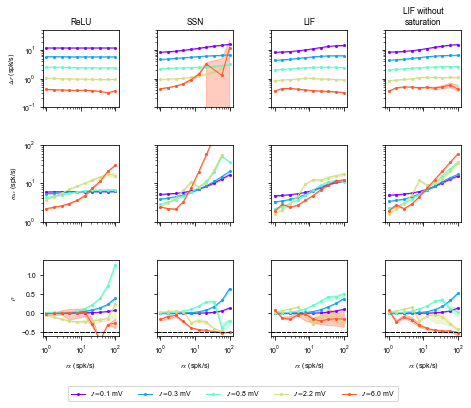

In [6]:
fig, axs = plt.subplots(3,len(models), figsize=(2.5*len(models),2.*4), 
                        facecolor='w', edgecolor='k',sharex=True,sharey='row')
fig.subplots_adjust(hspace = .5, wspace=.5)
area=1.0;linethicknes=1.0;
axs = axs.ravel()
font = {'family' : 'normal','weight' : 'normal','size'   : 7, 'family':'serif','serif':['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] =linethicknes
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42


models=['ReLU','SSN','LIF','LIF without\nsaturation']
for idx_model in range(len(models)):
    axs[idx_model].set_title(models[idx_model])
    results=RESULTS[idx_model]

    sim_r_X=results[:,0]
    sim_W=results[:,2]
    sim_K=results[:,4]
    g=np.unique(results[:,3])[0]
    K=np.unique(sim_K)[0]
    sim_ell=results[:,1]
    sim_results_r=results[:,9:14]
    sim_results_mu=results[:,14:19]
    sim_convergence=results[:,19:24]
    possible_r_X=np.unique(sim_r_X)
    possible_ell=np.unique(sim_ell)
    possible_W=np.unique(sim_W)


    #possible_J=possible_W/fun.tau*np.sqrt(K)/fun.sigma
    possible_J=possible_W/fun.tau
    
    
    colors=cm.rainbow(np.linspace(0,1,len(possible_W)))


    idx_ell=0;
    mean_results_r=np.nan*np.ones((len(possible_r_X),len(possible_W),5,3))
    mean_results_mu=np.nan*np.ones((len(possible_r_X),len(possible_W),5,3))
    #for idx_W in [8,6,4,2,0]:#range(len(possible_r_X)):
    for idx_W in [0,2,4,6,8]:#range(len(possible_r_X)):
        
        for idx_r_X in range(len(possible_r_X)):
            r_X=possible_r_X[idx_r_X]
            mask=(sim_ell==possible_ell[idx_ell])&(sim_r_X==r_X)&(sim_W==possible_W[idx_W]);
            for idx_cases in range(4):
                pippo_r=sim_results_r[mask,idx_cases]
                pippo_mu=sim_results_mu[mask,idx_cases]
                if np.size(pippo_r)>0:
                    mean_results_r[idx_r_X,idx_W,idx_cases,0]=np.median(pippo_r)
                    mean_results_r[idx_r_X,idx_W,idx_cases,1]=np.percentile(pippo_r,25)
                    mean_results_r[idx_r_X,idx_W,idx_cases,2]=np.percentile(pippo_r,75)
                    mean_results_mu[idx_r_X,idx_W,idx_cases,0]=np.median(pippo_mu)
                    mean_results_mu[idx_r_X,idx_W,idx_cases,1]=np.percentile(pippo_mu,25)
                    mean_results_mu[idx_r_X,idx_W,idx_cases,2]=np.percentile(pippo_mu,75)

            pippo_cov_r=sim_results_r[mask,idx_cases+1]
            pippo_cov_mu=sim_results_mu[mask,idx_cases+1]   
            if np.size(pippo_cov_r)>0:
                mean_results_r[idx_r_X,idx_W,idx_cases+1,0]=np.median(pippo_cov_r/pippo_r**2)
                mean_results_r[idx_r_X,idx_W,idx_cases+1,1]=np.percentile(pippo_cov_r/pippo_r**2,25)
                mean_results_r[idx_r_X,idx_W,idx_cases+1,2]=np.percentile(pippo_cov_r/pippo_r**2,75)
                mean_results_mu[idx_r_X,idx_W,idx_cases+1,0]=np.median(pippo_cov_mu/pippo_mu**2)
                mean_results_mu[idx_r_X,idx_W,idx_cases+1,1]=np.percentile(pippo_cov_mu/pippo_mu**2,25)
                mean_results_mu[idx_r_X,idx_W,idx_cases+1,2]=np.percentile(pippo_cov_mu/pippo_mu**2,75)


        mask=np.isnan(mean_results_mu[:,idx_W,0,0])==False

        
        axs[idx_model+0*len(models)].plot(possible_r_X[mask],mean_results_r[:,idx_W,1,0][mask],
                                        c=colors[idx_W],marker='o',markersize=2,label='mean')
        axs[idx_model+0*len(models)].fill_between(possible_r_X[mask],mean_results_r[:,idx_W,1,1][mask],
                                                mean_results_r[:,idx_W,1,2][mask],
                            color=colors[idx_W],alpha=0.3)
            
        axs[idx_model+1*len(models)].plot(possible_r_X[mask],mean_results_r[:,idx_W,3,0][mask],
                                          c=colors[idx_W],marker='o',markersize=2,label='mean')
        axs[idx_model+1*len(models)].fill_between(possible_r_X[mask],mean_results_r[:,idx_W,3,1][mask],
                                                mean_results_r[:,idx_W,3,2][mask],
                            color=colors[idx_W],alpha=0.3)
        
        axs[idx_model+2*len(models)].plot(possible_r_X[mask],mean_results_r[:,idx_W,4,0][mask],
                                          c=colors[idx_W],marker='o',markersize=2,label=r'$J=$%.1f mV'%possible_J[idx_W])
        axs[idx_model+2*len(models)].fill_between(possible_r_X[mask],mean_results_r[:,idx_W,4,1][mask],
                                                  mean_results_r[:,idx_W,4,2][mask],
                            color=colors[idx_W],alpha=0.3)
        
        
        


        axs[idx_model+0*len(models)].set_xscale('log')
        axs[idx_model+0*len(models)].set_yscale('log')
        
        axs[idx_model+1*len(models)].set_xscale('log')
        axs[idx_model+1*len(models)].set_yscale('log')
  

        axs[idx_model+2*len(models)].set_xscale('log')
        
        axs[idx_model+2*len(models)].axhline(y=-0.5,ls='--',c='k')
        
for idx in range(4):
    axs[idx+0*len(models)].set_ylim(0.1,50);
    axs[idx+1*len(models)].set_ylim(1,100);
    axs[idx+2*len(models)].set_ylim(-0.6,1.4);

    axs[idx+2*len(models)].set_xlabel(r'$r_X$ (spk/s)');

axs[0+0*len(models)].set_ylabel(r'${\Delta r}$ (spk/s)')
axs[0+1*len(models)].set_ylabel(r'$\sigma_{\Delta r}$ (spk/s)')
axs[0+2*len(models)].set_ylabel(r'$\rho$');
 
axs[0+2*len(models)].legend(loc='center',bbox_to_anchor=(2.5, -.75),ncol=5)
#fig.set_size_inches(2.5*len(models),2.*3)
plt.tight_layout()
cols,rows=4,3
fig.set_size_inches(1.875*cols,1.875*rows)
fig.savefig('resp_v_transfer_function.pdf', dpi=300, format='pdf', bbox_inches='tight')

